In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
youtube=pd.read_csv('C://Users//Acer//Downloads//Extra//Final Exams//Eda//youtube.csv') #Importing Data

In [3]:
youtube.shape

(5000, 6)

In [4]:
youtube.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [5]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [6]:
youtube.Subscribers.value_counts().head() #Here it is clearly visible that there are null values but not by the name null it is denoted as '-- '

--         387
92158        2
666561       2
1738897      1
526890       1
Name: Subscribers, dtype: int64

In [7]:
# So replace those null values by nan
youtube.Subscribers=youtube.Subscribers.replace(to_replace='-- ', value=np.nan)

In [8]:
# Subscribers column is in string so lets convert it in float
youtube.Subscribers=np.float_(youtube.Subscribers)

In [9]:
youtube.info() #see it is changed to foat (Subscribers      4613 non-null float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      4613 non-null float64
Video views      5000 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB


In [10]:
#There are null values but not by the name null it is denoted as '--'
youtube['Video Uploads']=youtube['Video Uploads'].replace(to_replace='--', value=np.nan)

In [11]:
#Video Uploads column is in string so let's convert it in float
youtube['Video Uploads']=np.float_(youtube['Video Uploads'])

In [12]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    4994 non-null float64
Subscribers      4613 non-null float64
Video views      5000 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 234.5+ KB


# From here their are some basic questions on EDA

# Q-1 What are the top 10 youtube channels as ordered by ‘number of subcribers’?

In [13]:
youtube.sort_values(by='Subscribers',ascending=False)['Channel name'].head(10)

1470           PewDiePie
1               T-Series
11       Canal KondZilla
174         Dude Perfect
3222      HolaSoyGerman.
435     JustinBieberVEVO
63            Ed Sheeran
10       5-Minute Crafts
4                    WWE
1942    whinderssonnunes
Name: Channel name, dtype: object

# Q-2 Generate a table which only contains data for channels which have less than 5000 video uploads. Sort this table by Rank.

In [14]:
youtube[youtube['Video Uploads']<5000].head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
10,11th,A+,5-Minute Crafts,2085.0,33492951.0,8587520379
11,12th,A+,Canal KondZilla,822.0,39409726.0,19291034467
12,13th,A+,Like Nastya Vlog,150.0,7662886.0,2540099931


# Q-3 Is there a relation ship between the number of video uploads and the number of subscribers? Generate a plot to support your answer.

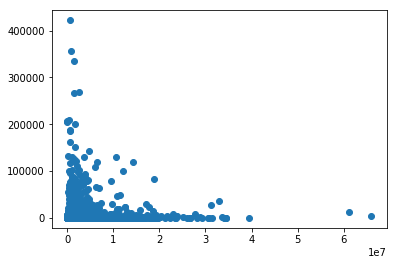

In [15]:
plt.scatter(youtube.Subscribers,youtube['Video Uploads'])

### Their is a weak correlation ie 0.011 between the number of video uploads and the number of subscribers

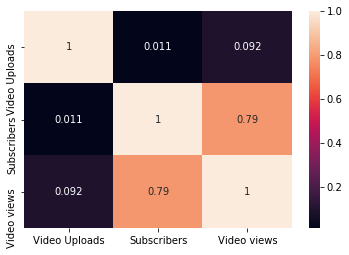

In [16]:
sns.heatmap(youtube.corr(), annot=True)

# Q-4 Plot the distribution of video views for the top 500 channels.

In [17]:
dist=youtube.sort_values(by='Video views',ascending=False)

In [18]:
dist['Video views'].head(500)

1       47548839843
4       26273668433
8       24518098041
6       23898730764
3       22675948293
0       20869786591
11      19291034467
1470    18684630003
435     17806717170
271     17470709876
81      17362242300
7       17202609850
5       16618094724
74      16519985673
27      16395683234
210     16244535352
304     15476966737
78      15212759916
121     14533614800
63      14521211040
1643    14185582037
19      14022189654
227     13969280371
212     13558498013
99      13503732638
269     13426887749
126     13403860667
630     13103339807
38      11920370065
242     11881872033
           ...     
12       2540099931
327      2537293803
1151     2535153504
4558     2534504345
2620     2533614944
2325     2531207220
1631     2524795914
2549     2524775184
923      2516674023
1523     2516114490
1983     2512967904
1023     2509756896
3070     2507680614
1960     2505457709
60       2499031601
1997     2494658095
356      2493477931
55       2492724832
1017     2491697636


C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


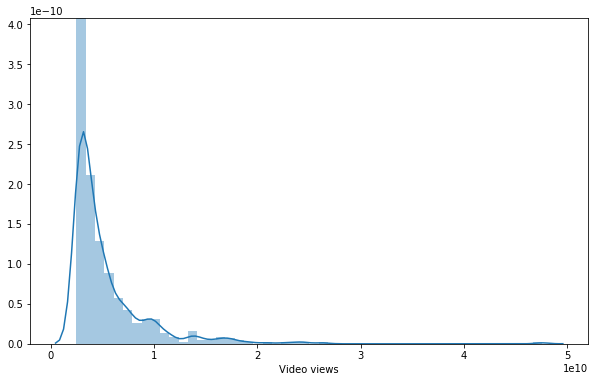

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(dist['Video views'].head(500))

# Q-5 Plot a gradewise distribution of all the youtube channels. Which grade has the highest number of channels?

In [20]:
youtube.Grade.value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

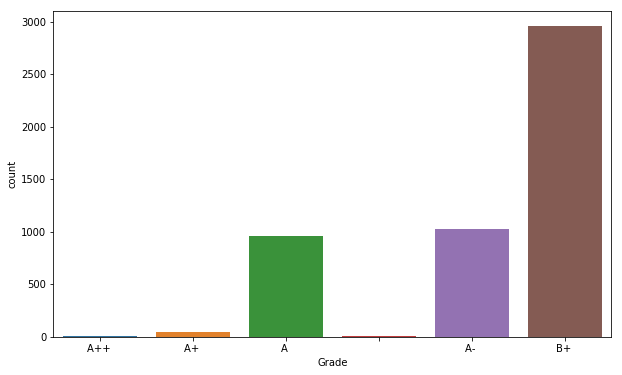

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(youtube.Grade)

# Q-6 Create correlation matrix for the datasets and  plot the pairwise correlations.

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Acer\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


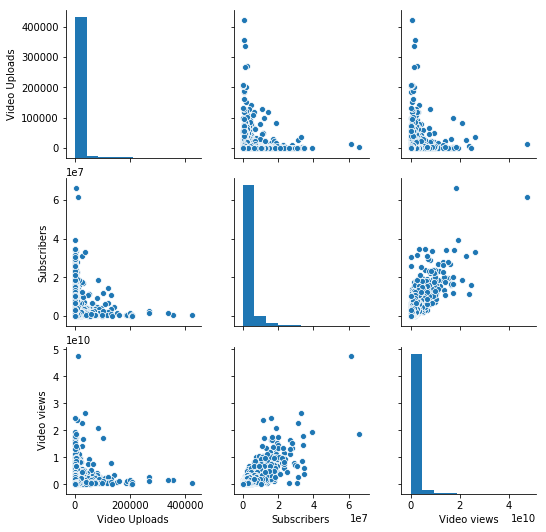

In [22]:
sns.pairplot(youtube)

In [23]:
youtube.corr()

,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.011362,0.092436
Subscribers,0.011362,1.000000,0.791281
Video views,0.092436,0.791281,1.000000


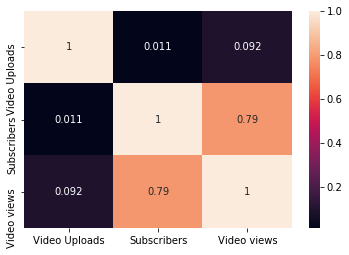

In [24]:
sns.heatmap(youtube.corr(), annot=True)

# Q-7 Create a new column in the dataset which contains the average number of subcribers per video upload. What are the top 5 channels based on this calculated average?

In [25]:
youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [26]:
youtube['Average_Subs']=youtube.Subscribers/youtube['Video Uploads']

In [27]:
youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Subs
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591,226.602596
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843,4833.449333
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,51577.080429
3,4th,A++,SET India,27323.0,31180559.0,22675948293,1141.183582
4,5th,A++,WWE,36756.0,32852346.0,26273668433,893.795462


###  the top 5 channels based on this calculated average?

In [28]:
youtube.sort_values(by='Average_Subs',ascending=False).head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Subs
4916,"4,917th",B+,fouseyTUBE,2.0,10523367.0,593861,5.261684e+06
628,629th,A,cocoz toon,1.0,2162992.0,333012122,2.162992e+06
389,390th,A,Bad Bunny,11.0,12685253.0,2612504875,1.153205e+06
94,95th,A,Tekashi 6ix9ine,3.0,3108447.0,353018727,1.036149e+06
3263,"3,264th",B+,AlfredoOlivasVEVO,2.0,1189424.0,42873889,5.947120e+05


# Q-8 For A++ grade channels, plot the distributions for the following columns:
# a. Video Uploads
# b. Subscribers
# c. Video views


In [29]:
a=youtube[youtube.Grade=='A++ ']

In [30]:
a

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Subs
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591,226.602596
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843,4833.449333
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,51577.080429
3,4th,A++,SET India,27323.0,31180559.0,22675948293,1141.183582
4,5th,A++,WWE,36756.0,32852346.0,26273668433,893.795462
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724,567.063618
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764,1338.066706
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850,121.313729
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041,14107.830702
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307,38.090407


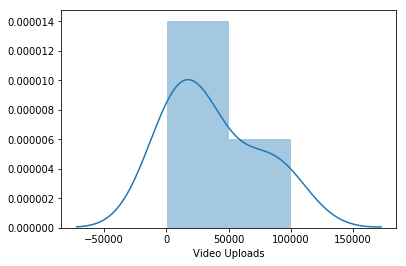

In [31]:
#Ans a
sns.distplot(a['Video Uploads'])

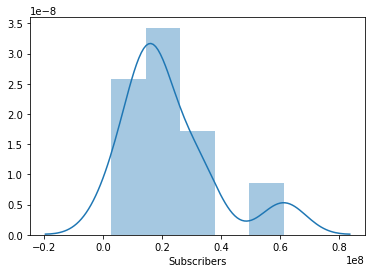

In [32]:
#Ans b
sns.distplot(a.Subscribers)

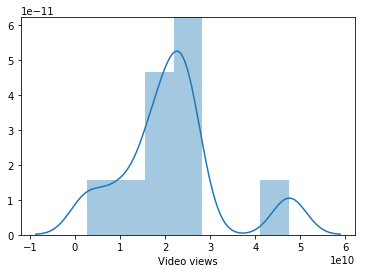

In [33]:
#Ans c
sns.distplot(a['Video views'])

# Q-9 Are there any outliers in the data. Generate boxplots to support your answer.

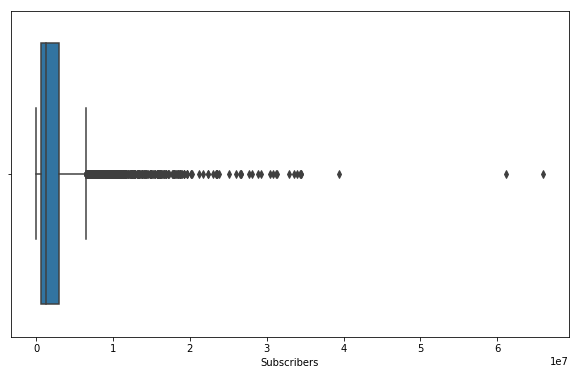

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(youtube.Subscribers)

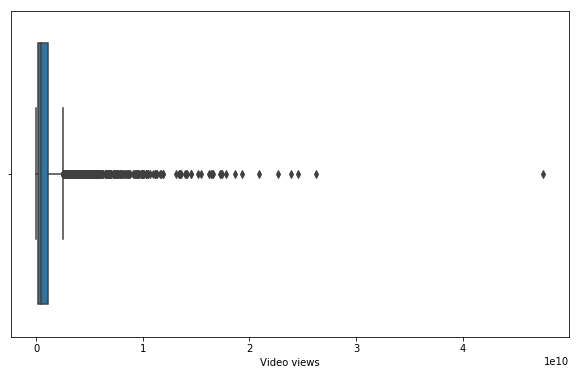

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(youtube['Video views'])

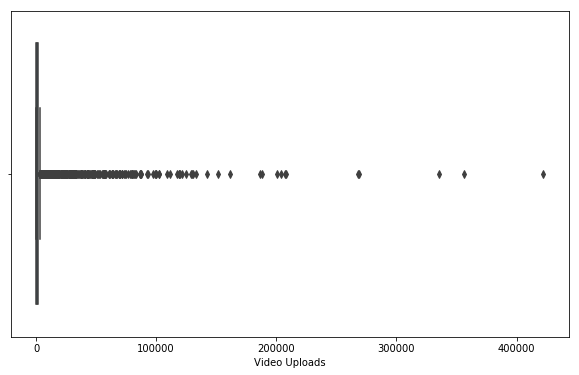

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(youtube['Video Uploads'])

# Q-10 An company wants to advertise their products on youtube. They approach you for some advice. He has the following questions. Do your best to answer the following questions with supporting plots where required.
### •	The advertiser wants to advertise in channels which regularly release fresh videos. He also  What are his top 5 choices? (3 marks)


### As the adviser want to advertise in channels which regularly release fresh videos so we can find the higgest number of Videos Uploads, as that channel has more number of videos uploaded that means he post regular video on his channel 

In [38]:
youtube.sort_values(['Video Uploads'], ascending=False).head(5)['Channel name'] #These are the top 5 channel which are regular

3453    AP Archive
1149      YTN NEWS
2223     SBS Drama
323       GMA News
2956           MLB
Name: Channel name, dtype: object

### •The advertiser has some constraints with regard to the cost of advertising. The cost depends on the number of average views per video. Suggest the best 10 channels with average views between 1000000 to 500000. (4 marks)

In [39]:
# We have to make a new column for Average_View_Per_Video
youtube['Average_View_Per_Video']=youtube['Video views']/youtube['Video Uploads']

In [40]:
youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Subs,Average_View_Per_Video
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591,226.602596,2.521815e+05
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843,4833.449333,3.755536e+06
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,51577.080429,2.625551e+07
3,4th,A++,SET India,27323.0,31180559.0,22675948293,1141.183582,8.299216e+05
4,5th,A++,WWE,36756.0,32852346.0,26273668433,893.795462,7.148130e+05


In [41]:
youtube[(youtube['Average_View_Per_Video']<=1000000) & (youtube['Average_View_Per_Video']>=500000)].head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Subs,Average_View_Per_Video
3,4th,A++,SET India,27323.0,31180559.0,22675948293,1141.183582,829921.615233
4,5th,A++,WWE,36756.0,32852346.0,26273668433,893.795462,714813.049108
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724,567.063618,549485.656978
14,15th,A+,Wave Music,16119.0,15899764.0,10989179147,986.398908,681753.157578
19,20th,A+,WorkpointOfficial,24287.0,17687229.0,14022189654,728.259110,577353.714086
29,30th,A+,Kirin AMV's,230.0,459906.0,224608044,1999.591304,976556.713043
53,54th,A,Ultra Bollywood,10714.0,10490425.0,6239740374,979.132444,582391.298675
61,62nd,A,1theK (원더케이),12942.0,12918410.0,10657097331,998.177252,823450.574177
67,68th,A,Shemaroo,6466.0,10846501.0,4795061785,1677.466904,741580.851376
77,78th,A,Eros Now,9852.0,13820875.0,8651382337,1402.849675,878134.626167
